<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumGates_HGate_lAerSimulator_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'
%python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit_aer import AerSimulator

local_simulator = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'

print(local_simulator)

AerSimulator('aer_simulator_statevector')


In [4]:
print(local_simulator.max_circuits)

None


In [5]:
local_simulator.description

'A C++ Qasm simulator with noise'


# H(Hadamard Gate)
중첩상태로 만들어 주는 Gate




In [52]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

HGateCircuit = QuantumCircuit(1, 1)
HGateCircuit.h(0)

In [53]:
from qiskit.quantum_info import Operator
unitary = Operator(HGateCircuit)
print(unitary)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


In [54]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [69]:
circuit = QuantumCircuit(1, 1)
circuit.reset(0)
circuit.h(0)
circuit.measure(0, 0)

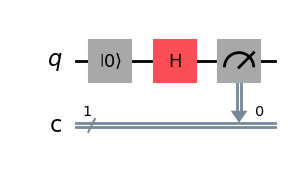

In [56]:
circuit.draw(output='mpl')

In [57]:
job = local_simulator.run(circuit, shots=1024)
result = job.result()

In [58]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='1a55c6ac-53cf-44d4-aa76-0a4d873974fb', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 502, '0x0': 522}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-188', qreg_sizes=[['q', 1]], metadata={}), status=DONE, seed_simulator=4293754762, metadata={'time_taken': 0.014689609, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 1, 'active_input_qubits': [0], 'num_clbits': 1, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.

In [59]:
result.backend_name

'aer_simulator_statevector'

In [60]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 502, '0x0': 522}), header=QobjExperimentHeader(creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-188', qreg_sizes=[['q', 1]], metadata={}), status=DONE, seed_simulator=4293754762, metadata={'time_taken': 0.014689609, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 1, 'active_input_qubits': [0], 'num_clbits': 1, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.014689609)]

In [61]:
result.results[0].data.counts

{'0x1': 502, '0x0': 522}

In [62]:
result.get_counts()

{'1': 502, '0': 522}

In [63]:
counts = result.get_counts()
print(counts)

{'1': 502, '0': 522}


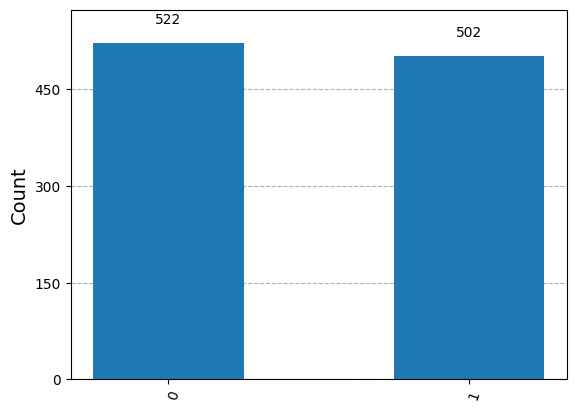

In [66]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_histogram(counts)

In [97]:
circuit2 = QuantumCircuit(1, 1)
circuit2.reset(0)
circuit2.x(0)
circuit2.h(0)

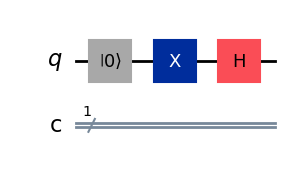

In [98]:
circuit2.draw(output='mpl')

In [99]:
from qiskit.quantum_info import Statevector

psi = Statevector(circuit2)

In [94]:
print(psi)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


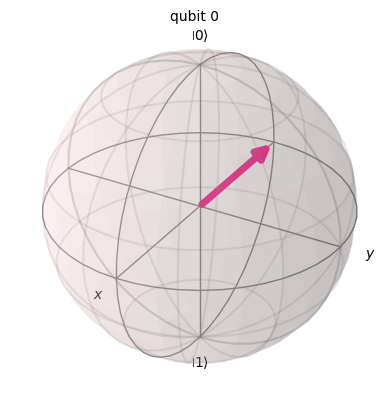

In [100]:
plot_bloch_multivector(state=psi)